# predicting heart disease using machine learing

#### this notebook looks into using various python-based machine learing and data science libraris in an attempt to build a machine learing model capable of predicting whether or not someone has heart disease based on their medical attributes

**we're going to take the follwing approach:**
1. problem definition
2. data
3. Evaluation
4. features
5. modelling
6. experimenting

## 1. problem defination

in a statment,
> given clinical parameters about a patient, can we predict whether they have heart disease or not

In [1]:
# import all the tools we need

# regular EDA (exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### load data

In [4]:
data = pd.read_csv("heart-disease.csv")
data.shape

(303, 14)

### data exploration (exploratory data analysis or EDA)

the goal here is to find out more about the data and become subject matter export on the dataset you're working with.



In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

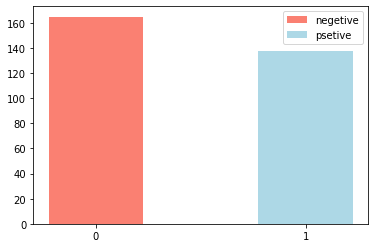

In [6]:
target_count = pd.DataFrame(data.target.value_counts())
fig, ax = plt.subplots()

ax.bar('0',target_count.loc[1,'target'],color=['salmon'],label='negetive',width= 0.45)
ax.bar('1',target_count.loc[0,'target'],color=['lightblue'],label='psetive',width= 0.45)

#ax.set_labels('hello')
ax.legend()
#target_count.loc[1,'target']

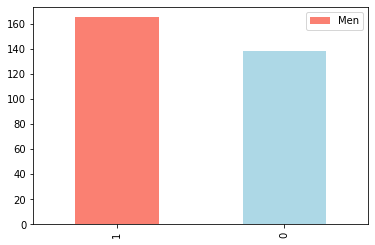

In [7]:
ax=data['target'].value_counts().plot(kind='bar',color=['salmon', 'lightblue'])
#plt.legend(title='ved',)

plt.legend(['Men', 'Women'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# comper target column with sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


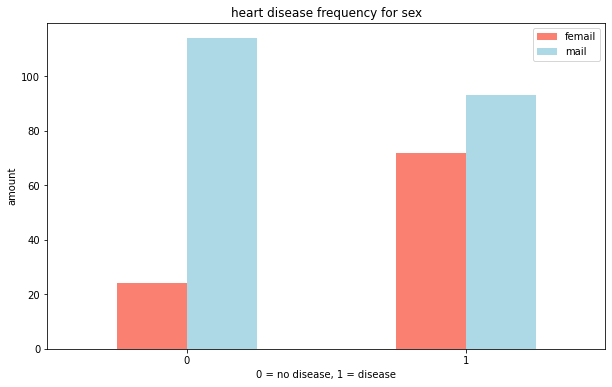

In [13]:
# create a plot of crosstab

pd.crosstab(data.target,data.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title("heart disease frequency for sex")
plt.xlabel('0 = no disease, 1 = disease')
plt.ylabel('amount')
plt.legend(['femail','mail',])
plt.xticks(rotation=0); # for rotating x label

In [14]:
data.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [15]:
pd.crosstab(data.thalach, data.target) 

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


## age vs max heart rate for heart disease

Text(0, 0.5, 'heart rate')

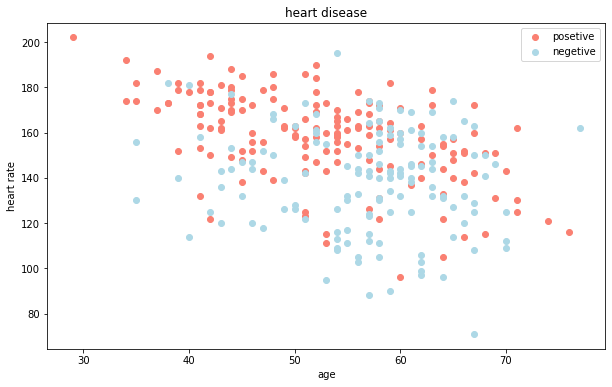

In [16]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with posetive examples
plt.scatter(data.age[data.target == 1], 
            data.thalach[data.target==1],
            c='salmon')
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c='lightblue');
plt.legend(('posetive','negetive'))
plt.title('heart disease')
plt.xlabel('age')
plt.ylabel('heart rate')

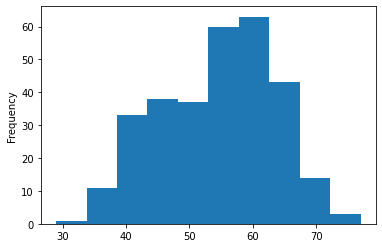

In [17]:
# check the distribution of the age column with a histogram

data.age.plot.hist();

## heart disease frequency per chest pain type

In [18]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


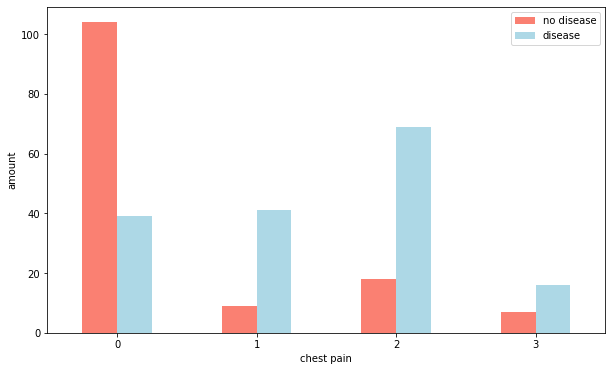

In [19]:
pd.crosstab(data.cp,data.target).plot(kind='bar',figsize=(10,6),
                                     color=['salmon','lightblue'])

plt.xlabel('chest pain')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0);

In [20]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


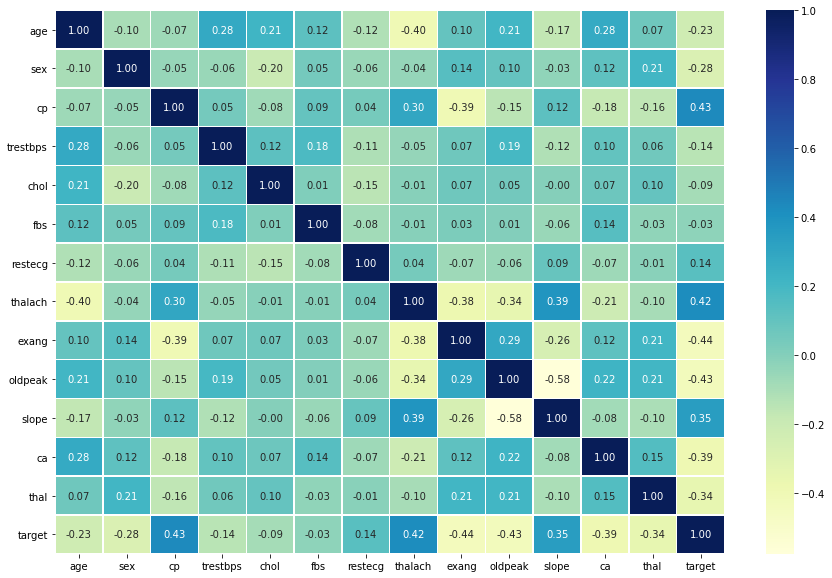

In [21]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = '.2f',
                cmap='YlGnBu');

In [22]:
# split data and y

X = data.drop('target',axis=1)
Y = data['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
# split data
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [24]:
Y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [26]:
len(X_train),len(Y_train)

(242, 242)

<img src='ml_map.png'>

we're going to try 3 diffrent machine learing model
1. logistic regression
2. K-Nearest Neighbours classification
3. Random forest classification

In [27]:
# put models 
models = {"Losgostic Regression": LogisticRegression(),
          "KMN": KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# create afunction to fit and score models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    fits and evaluate given machine learing model.
    models : a dict of different Scikit_Learn machine learing models
    X_train, Y_train : trainig data
    X_test, Y_test : testing data
    """
    np.random.seed(42)
    # make dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        
        # fit the model to the data
        
        model.fit(X_train, Y_train)
        
        
        # evaluate the model and append its score to the model_scores Dictionary
        
        model_scores[name] = model.score(X_test, Y_test)
        
        
    return model_scores

In [28]:
model_Scores = fit_and_score(models,
              X_train, 
              X_test, 
              Y_train, 
              Y_test)    
model_Scores

C:\Users\vnand\Desktop\data_science\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Losgostic Regression': 0.8852459016393442,
 'KMN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model cpmparison

Text(0.5, 1.0, 'mechin learing model score')

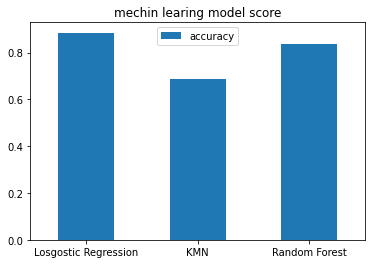

In [29]:
model_compare = pd.DataFrame(model_Scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.title("mechin learing model score")

now we've got baseline model... and we known a model's first prediction aren't always what we should based our next steps off what should do?

let's look at the following:
* hyperparameter tunig
* feature importance
* confusion matrics
* cross-validation 
* precision
* recall
* F1 score
* classification report
* ROC curve
* area under the curve (AUC)

## hyperparameter tunig
* train KNN

In [30]:
train_score = []
test_score = []

# Create a list of diffrent values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
Knn = KNeighborsClassifier()

# loop through diffrent n_neighbors
for i in neighbors:
    Knn.set_params(n_neighbors = i)
    
    # fit the model
    Knn.fit(X_train,Y_train)
    
    # update the train scores list
    train_score.append(Knn.score(X_train,Y_train))
    
    # update test score list
    test_score.append(Knn.score(X_test,Y_test))
     
    

In [31]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max score 75.41


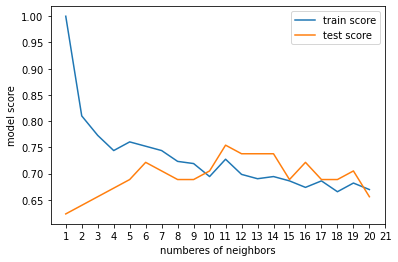

In [33]:
plt.plot(neighbors,train_score,label='train score')
plt.plot(neighbors,test_score, label="test score")
plt.xlabel('numberes of neighbors')
plt.ylabel('model score')
plt.xticks(range(1,22)) # or we can use np.arrange (1,21,1)
plt.legend()

print(f'max score {max(test_score)*100:.2f}')

## hyperparameter tunig  with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassification()

**using RandomizedSearchCV**

In [34]:
# crate a hyperparameter grid  for LogisticRegression

log_reg_grid = {"C" :np.logspace(-4,4,20),
                "solver": ['liblinear']}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}  

In [35]:
# tune logisticRegression

np.random.seed(42)

#setup random hyperparameter search for LOgisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid, 
                                cv=5,
                                n_iter = 20,
                               verbose = True)

# fit random Hyperparamter search model for LogisticRegression

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [37]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
rs_rf_clas = RandomizedSearchCV(RandomForestClassifier(),
                                     param_distributions=rf_grid,
                                     cv=5,
                                    n_iter=20,
                                    verbose=True)
rs_rf_clas.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
rs_rf_clas.score(X_test,Y_test)

In [ ]:
rs_rf_clas.best_estimator_

In [ ]:
rs_rf_clas.best_params_

## hyperparameter tunig with GridSearchCV

LogisticRegression

In [ ]:
# diffrent hyperparameters for LogicRegression model

log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}


# setup GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)

In [ ]:
gs_log_reg.fit(X_train,Y_train)

In [ ]:
gs_log_reg.score(X_test,Y_test)

In [ ]:
gs_log_reg.best_params_

## evaluating our machine learing classifier beyound accuracy

* Roc curve and auc score
* confusion matrix
* classification reporet
* precision
* recall
* F1 score

...And it would great if cross-validation was used where possible

to make comparison and evaluate our trained model first we need to make predictions.

In [ ]:
# make prediction with tuned model

Y_preds = gs_log_reg.predict(X_test)

In [ ]:
Y_preds

In [ ]:
Y_test.head()

# importt roc_curve, cofusion_matrix, classification_reprt, precision_score, f1_score, recall score

In [ ]:
from sklearn.metrics import roc_curve,confusion_matrix,classification_report,precision_score,f1_score,recall_score

In [ ]:
plot_roc_curve(gs_log_reg, X_test,Y_test)

In [ ]:
# confusion matrix

print(confusion_matrix(Y_test, Y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
    plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("true label")
    plt.ylabel("prediction label")
    
    ## if numbers not upeare in proper way in the square box then do this
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, Y_preds)

In [ ]:
print(classification_report(Y_test, Y_preds))

### calculate evaluateion metrics using cross-validation score

In [ ]:
# check best hyperparameters

gs_log_reg.best_params_

In [ ]:
clf  =LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')


In [ ]:
# cross-validaed accuracy

cv_acc =cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# cross-validated precision

cv_precision = cross_val_score(clf,
                              X,
                              Y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision 


In [ ]:
# cross=validated recall

cv_recall = np.mean(cross_val_score(clf,
                                   X,
                                   Y,
                                   cv=5,
                                   scoring='recall'))
 
cv_recall

In [ ]:
# cross=validated recall

cv_f1 = np.mean(cross_val_score(clf,
                                   X,
                                   Y,
                                   cv=5,
                                   scoring='f1'))
 
cv_f1

In [ ]:
# visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='cross-validated classification metrics',legend=False)
plt.xticks(rotation=0);

### feature importance

feature importance is another as asking, which features contributed most to the outcomes of the model and how did they contribute?



In [ ]:
data.head()

### let's find feature importance for our LogisticRegression model

In [ ]:
# fit model
clf = LogisticRegression(C=0.204335,
                        solver='liblinear')
clf.fit(X_train,Y_train)


In [ ]:
# check coef_
clf.coef_

In [ ]:
feature_dict = dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

In [ ]:
sum(feature_dict.values())
    

In [ ]:
# visualize feature importance

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [ ]:
pd.crosstab(data['sex'],data["target"])

In [ ]:
try_seborn = pd.crosstab(data['sex'],data["target"])

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(try_seborn, annot=True, cbar=False,fmt='g')



In [ ]:
sns.heatmap(pd.crosstab(data['slope'],data['target']), annot=True, cbar=False,fmt='g')